In [35]:
import pandas as pd

df = pd.read_csv('colon_image_dist_results.csv')
df.head()

,gene,total_num_dist,num_diff_dist,hypergeom_p_val,fraction_diff_dist,healthy_low,healthy_medium,healthy_high,health_not_detected,cancer_low,cancer_medium,cancer_high,cancer_not_detected,median_cdist,mean_cdist
0,SLC22A13,2,2,0.000000e+00,1.000000,2,0,0,2,1,0,0,15,0.289651,0.289651
1,CASKIN1,4,4,0.000000e+00,1.000000,0,2,0,0,2,0,0,7,0.286730,0.291112
2,NUP85,16,13,6.510000e-17,0.812500,0,2,0,0,4,2,3,1,0.303801,0.344350
3,CA2,21,14,1.210000e-15,0.666667,0,1,3,0,0,0,0,13,0.289046,0.264565
4,SH3GL2,22,14,3.630000e-15,0.636364,3,0,0,5,3,0,0,26,0.282952,0.288513


In [54]:
target_df = pd.read_csv('target_indication.tsv', delimiter='\t')
target_df.head()

,MSH,ensembl_id,lApprovedUS.EU,Phase.Latest,First.Added,Inactive,symbol
0,"Abortion, Spontaneous",ENSG00000119535,False,unknown,NaN,True,CSF3R
1,Acidosis,ENSG00000151617,False,Phase I Clinical Trial,2012-10-27,False,EDNRA
2,Acne Vulgaris,ENSG00000012779,False,Phase II Clinical Trial,NaN,True,ALOX5
3,Acne Vulgaris,ENSG00000026508,False,Approved,NaN,False,CD44
4,Acne Vulgaris,ENSG00000057252,False,unknown,2009-07-01,True,SOAT1


In [55]:
target_df[target_df['MSH']=='Colorectal Neoplasms']

,MSH,ensembl_id,lApprovedUS.EU,Phase.Latest,First.Added,Inactive,symbol
5106,Colorectal Neoplasms,ENSG00000003402,False,Preclinical,2015-05-11,True,CFLAR
5107,Colorectal Neoplasms,ENSG00000004468,False,Phase II Clinical Trial,2005-05-13,False,CD38
5108,Colorectal Neoplasms,ENSG00000006283,False,Preclinical,2009-02-12,True,CACNA1G
5109,Colorectal Neoplasms,ENSG00000006327,False,Phase I Clinical Trial,2008-03-17,True,TNFRSF12A
5110,Colorectal Neoplasms,ENSG00000007062,False,Preclinical,2017-09-25,False,PROM1
...,...,...,...,...,...,...,...
5504,Colorectal Neoplasms,ENSG00000254087,False,Phase III Clinical Trial,2001-10-30,False,LYN
5505,Colorectal Neoplasms,ENSG00000259207,False,Phase II Clinical Trial,1995-01-15,True,ITGB3
5506,Colorectal Neoplasms,ENSG00000263761,False,unknown,2007-05-30,True,GDF2
5507,Colorectal Neoplasms,ENSG00000278195,False,Phase II Clinical Trial,2002-11-27,False,SSTR3


In [56]:
target_df['Phase.Latest'].unique()

array(['unknown', 'Phase I Clinical Trial', 'Phase II Clinical Trial',
       'Approved', 'Preclinical', 'Phase III Clinical Trial',
       'Pre-registration'], dtype=object)

In [60]:
target_df[target_df['MSH']=='Colorectal Neoplasms'].groupby(['Phase.Latest', 'lApprovedUS.EU', 'Inactive']).count()

MSH  ensembl_id  \
Phase.Latest             lApprovedUS.EU Inactive                    
Approved                 False          False       1           1   
                                        True        3           3   
                         True           False       2           2   
                                        True        9           9   
Phase I Clinical Trial   False          False      32          32   
                                        True       47          47   
Phase II Clinical Trial  False          False      49          49   
                                        True       78          78   
Phase III Clinical Trial False          False       4           4   
                                        True       10          10   
Pre-registration         False          False       1           1   
                                        True        3           3   
Preclinical              False          False      28          28   
                                        True       64          64   
unknown                  False          True       72          72   

                                                  First.Added  symbol  
Phase.Latest             lApprovedUS.EU Inactive                       
Approved                 False          False               1       1  
                                        True                2       3  
                         True           False               2       2  
                                        True                9       9  
Phase I Clinical Trial   False          False              31      32  
                                        True               45      47  
Phase II Clinical Trial  False          False              45      49  
                                        True               77      78  
Phase III Clinical Trial False          False               3       4  
                                        True               10      10  
Pre-registration         False          False               1       1  
                                        True                3       3  
Preclinical              False          False              25      28  
                                        True               62      64  
unknown                  False          True               60      72

In [68]:
colon_target_df = target_df[target_df['MSH']=='Colorectal Neoplasms'].rename(columns={'symbol':'gene'})
# colon_target_df = colon_target_df[colon_target_df['Phase.Latest'].isin(['Launched', 'Discontinued', 'Withdrawn'])]
# colon_target_df['approval_binary'] = colon_target_df.apply(lambda row: 1 if row['Phase.Latest']=='Launched' else 0, axis=1) 

In [69]:
colon_target_df.head()

,MSH,ensembl_id,lApprovedUS.EU,Phase.Latest,First.Added,Inactive,gene
5106,Colorectal Neoplasms,ENSG00000003402,False,Preclinical,2015-05-11,True,CFLAR
5107,Colorectal Neoplasms,ENSG00000004468,False,Phase II Clinical Trial,2005-05-13,False,CD38
5108,Colorectal Neoplasms,ENSG00000006283,False,Preclinical,2009-02-12,True,CACNA1G
5109,Colorectal Neoplasms,ENSG00000006327,False,Phase I Clinical Trial,2008-03-17,True,TNFRSF12A
5110,Colorectal Neoplasms,ENSG00000007062,False,Preclinical,2017-09-25,False,PROM1


In [70]:
df.head()

,gene,total_num_dist,num_diff_dist,hypergeom_p_val,fraction_diff_dist,healthy_low,healthy_medium,healthy_high,health_not_detected,cancer_low,cancer_medium,cancer_high,cancer_not_detected,median_cdist,mean_cdist
0,SLC22A13,2,2,0.000000e+00,1.000000,2,0,0,2,1,0,0,15,0.289651,0.289651
1,CASKIN1,4,4,0.000000e+00,1.000000,0,2,0,0,2,0,0,7,0.286730,0.291112
2,NUP85,16,13,6.510000e-17,0.812500,0,2,0,0,4,2,3,1,0.303801,0.344350
3,CA2,21,14,1.210000e-15,0.666667,0,1,3,0,0,0,0,13,0.289046,0.264565
4,SH3GL2,22,14,3.630000e-15,0.636364,3,0,0,5,3,0,0,26,0.282952,0.288513


In [111]:
clindev_labels = ['Phase I Clinical Trial', 'Phase II Clinical Trial', 'Phase III Clinical Trial', 'Approved', 'Pre-registration']

final_df = df.merge(colon_target_df, on='gene', how='left')
final_df['any_candidate'] = final_df.apply(lambda row: 1 if row['MSH']=='Colorectal Neoplasms' else 0, axis=1)
final_df['any_clindev'] = final_df.apply(lambda row: 1 if row['Phase.Latest'] in clindev_labels else 0, axis=1)
final_df['approved'] = final_df.apply(lambda row: 1 if row['Phase.Latest']=='Approved' else 0, axis=1)

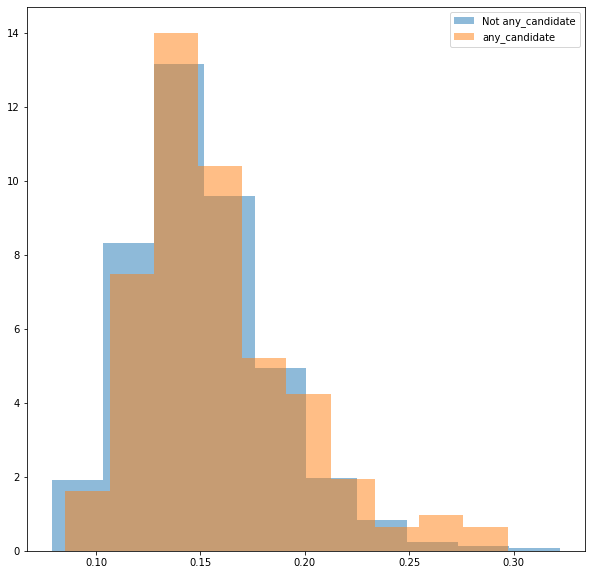

In [126]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
final_df = final_df.fillna('none')
var = 'any_candidate'
ax.hist(final_df[final_df[var]==0]['median_cdist'], label='Not {}'.format(var), density=True, alpha=0.5)
ax.hist(final_df[final_df[var]==1]['median_cdist'], label='{}'.format(var), density=True, alpha=0.5)
ax.legend()

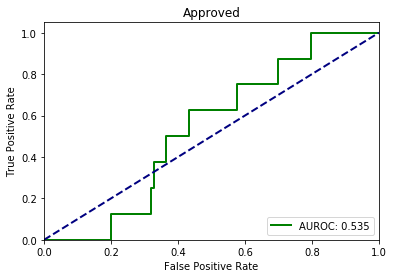

In [95]:
plot_roc_curve(final_df['approved'], final_df['mean_cdist'], 'Approved')

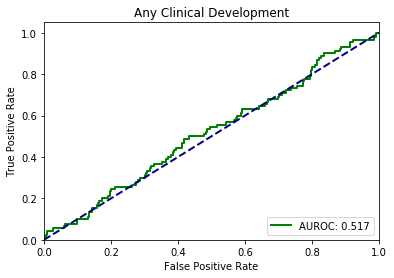

In [96]:
plot_roc_curve(final_df['any_clindev'], final_df['mean_cdist'], 'Any Clinical Development')

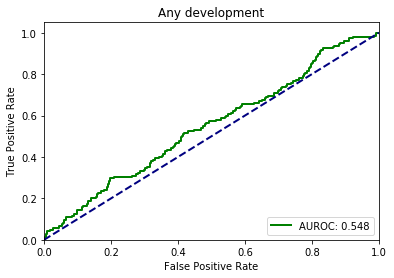

In [105]:
plot_roc_curve(final_df['any_candidate'], final_df['mean_cdist'], 'Any development')